<a href="https://colab.research.google.com/github/Manuel-Gomez-05/Regalos-Navidad-2025/blob/main/bode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

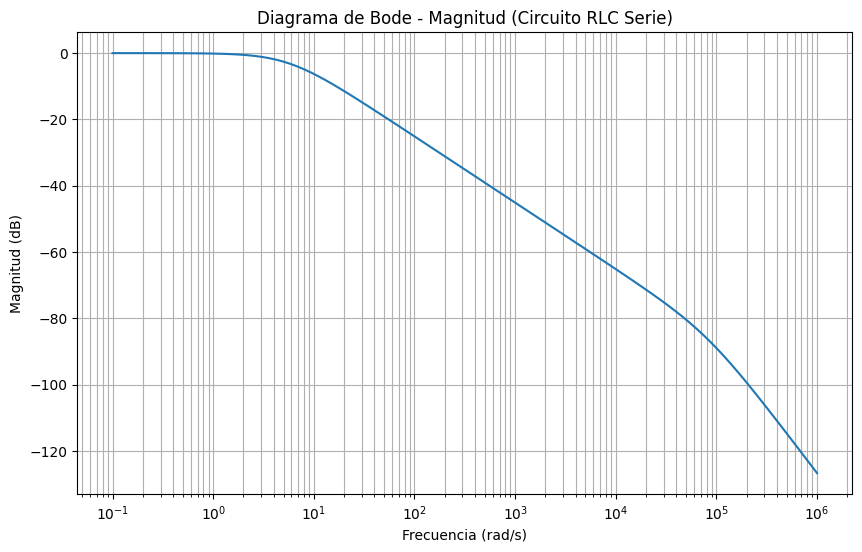

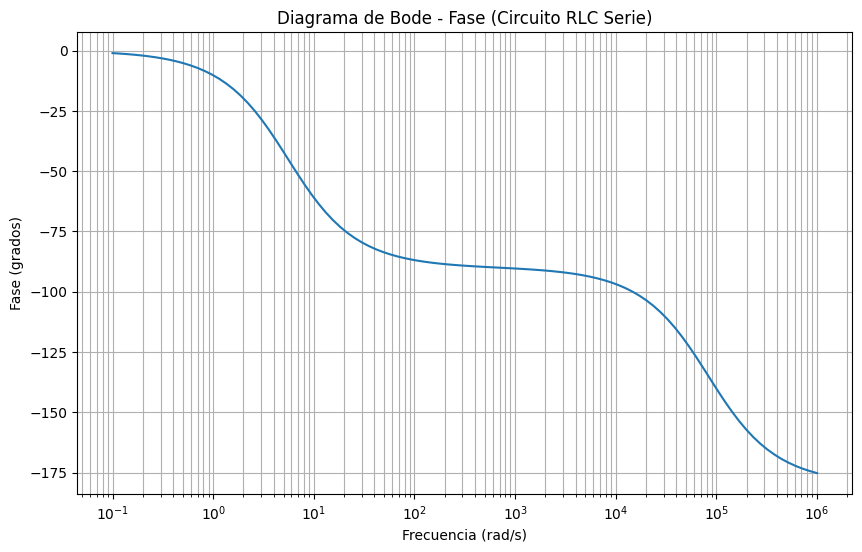

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito RLC serie
R = 1000      # Resistencia en ohmios
L = 0.012      # Inductancia en henrios
C = 180*10**-6     # Capacitancia en faradios

# Función de transferencia del circuito RLC serie:
# H(s) = 1 / (L*C*s^2 + R*C*s + 1)

num = [1]                          # Numerador
den = [L*C, R*C, 1]                # Denominador

# Crear el sistema
system = signal.TransferFunction(num, den)

# Obtener frecuencias y respuesta Bode
w, mag, phase = signal.bode(system)

# --------------------------
#   GRÁFICA DE MAGNITUD
# --------------------------
plt.figure(figsize=(10,6))
plt.semilogx(w, mag)       # Eje logarítmico
plt.title("Diagrama de Bode - Magnitud (Circuito RLC Serie)")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Magnitud (dB)")
plt.grid(True, which="both")
plt.show()

# --------------------------
#   GRÁFICA DE FASE
# --------------------------
plt.figure(figsize=(10,6))
plt.semilogx(w, phase)
plt.title("Diagrama de Bode - Fase (Circuito RLC Serie)")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Fase (grados)")
plt.grid(True, which="both")
plt.show()

# la magnitud muestra como funciona el sistema segun la entrada que se aplique en el , si el sistema no soporta frecuencias mayores a las del rango de la frecuencia de corte(-3db) , de lo contrario va a atenuar ( apagar) la entrada en la salida

#la fase muestra como varia ese angulo en funcion de la frecuencia , generando retardos( adelantos o atrasos) , con condiciones inciales se puede reducir esos retardos , mejorando la linealidad

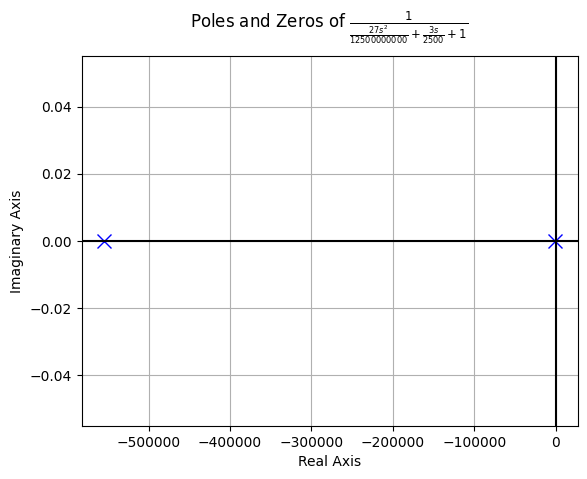

In [4]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction(1,L*C*s**2 + R*C*s + 1,s) #Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y
#Modelo en el tiempo en función de RLC
Ye = Y # Corrected: Changed Yp to Y
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

#Modelo en el tiempo con RLC evaluados
RLC = {R: 1000, L: sym.Rational('0.00180'), C: sym.Rational('0.00000120')}#valores utilizados para la simulación
Ye = Y.subs(RLC) # Corrected: Changed Yp to Y
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

# los polos deben de ir a la izqueirda para que de -a y asi el euler complejo se pueda apagar y asi el sistema sea estable

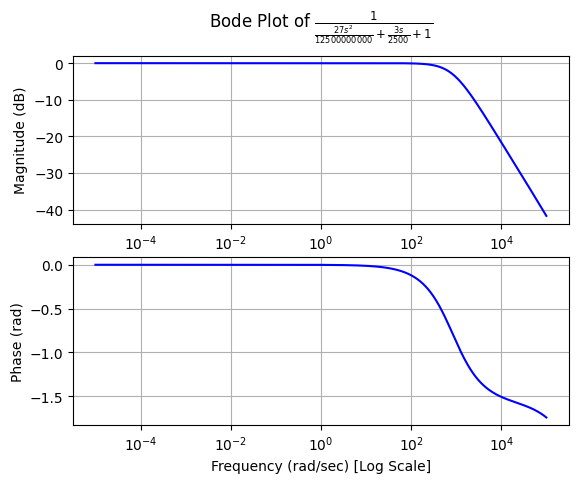

In [5]:
control.bode_plot(HRLC)

**solucion con simpy control api**

In [ ]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [ ]:

import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

#Entrada de interés en Laplace
X = 1 # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa
#Forma canónica -> resolver según sistema propuesto
K = 1 #ganancia estática
wn = sym.sqrt(1/(C*L)) #frecuencia natural
xi = L/(2*R*sym.sqrt(C*L)) #factor amortiguamiento
H = K*(wn**2/(s**2 + 2*xi*wn*s + wn**2)) #función de transferencia en lazo cerrado slit 2 orden
#Hlc = H/(1+H) #para lazo cerrado
H

#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

#evaluar valores RLC
RLC = {R: 1, L: sym.Rational('0.5'), C: sym.Rational('0.4')}#valores utilizados para la simulación
H.subs(RLC)

print('p1=',p1.subs(RLC))
print('p2=',p2.subs(RLC))
print('xi=',xi.subs(RLC))
print('omega_n=',wn.subs(RLC))

#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y


#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt
